In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [110]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df_num = df.select_dtypes('int64')

In [7]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

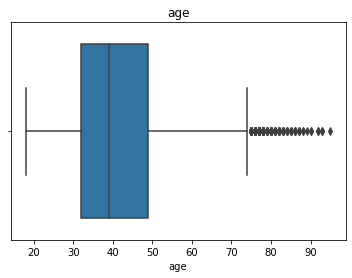

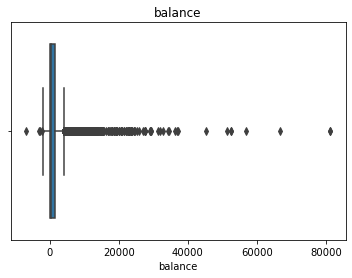

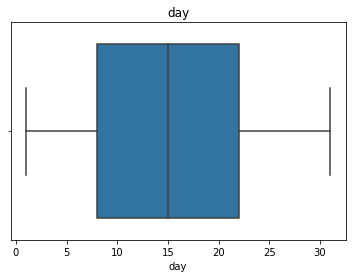

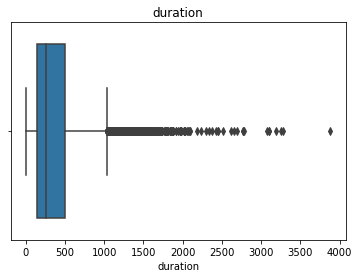

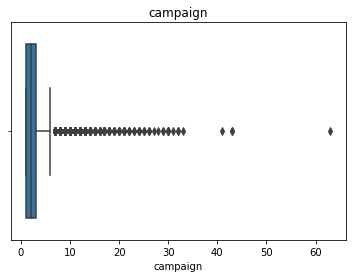

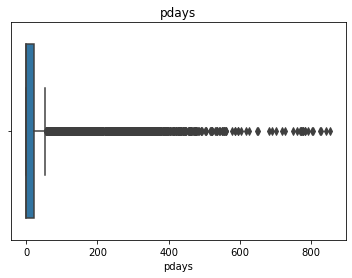

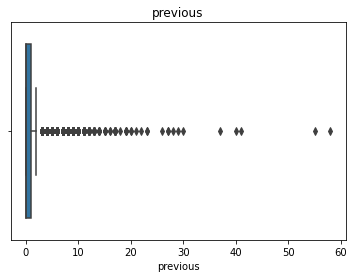

In [8]:
for i in df_num:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [9]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
mod=ols('balance ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df        sum_sq       mean_sq          F        PR(>F)
loan          1.0  8.308048e+08  8.308048e+08  80.428129  3.494868e-19
Residual  11160.0  1.152803e+11  1.032978e+07        NaN           NaN


In [20]:
tukey_Zone_Class=pairwise_tukeyhsd(df.balance,df.loan,alpha=0.05)
print(tukey_Zone_Class)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
    no    yes -809.1209 0.001 -985.9708 -632.2711   True
--------------------------------------------------------


In [21]:
from scipy.stats import ttest_ind

In [22]:
a=df[df.loan=='yes']
b=df[df.loan=='no']
ttest_ind(a['balance'],b['balance'])

Ttest_indResult(statistic=-8.968173116079658, pvalue=3.494867793523775e-19)

#  p-value is less than 0.05 so balance is a good predictor

In [23]:
mod=ols('age ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df        sum_sq      mean_sq          F    PR(>F)
loan          1.0  1.563616e+03  1563.616168  11.026837  0.000901
Residual  11160.0  1.582499e+06   141.800974        NaN       NaN


In [24]:
tukey_Zone_Class=pairwise_tukeyhsd(df.age,df.loan,alpha=0.05)
print(tukey_Zone_Class)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no    yes    -1.11 0.001 -1.7653 -0.4548   True
---------------------------------------------------


#  p-value is less than 0.05 so age is a good predictor

In [25]:
mod=ols('day ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df         sum_sq     mean_sq         F    PR(>F)
loan          1.0     236.007966  236.007966  3.329023  0.068094
Residual  11160.0  791177.716187   70.894061       NaN       NaN


In [26]:
tukey_Zone_Class=pairwise_tukeyhsd(df.day,df.loan,alpha=0.05)
print(tukey_Zone_Class)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    no    yes   0.4312 0.0681 -0.0321 0.8946  False
---------------------------------------------------


#  p-value is more than 0.05 so day is a bad predictor

In [35]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [36]:
mod=ols('duration ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df        sum_sq        mean_sq         F    PR(>F)
loan          1.0  4.924919e+03    4924.919449  0.040868  0.839797
Residual  11160.0  1.344875e+09  120508.472191       NaN       NaN


In [39]:
tukey_Zone_Class=pairwise_tukeyhsd(df.duration,df.loan,alpha=0.05)
print(tukey_Zone_Class)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    no    yes    -1.97 0.8443 -21.0715 17.1315  False
-----------------------------------------------------


#  p-value is more than 0.05 so duration is a bad predictor

In [40]:
mod=ols('campaign ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df        sum_sq    mean_sq          F    PR(>F)
loan          1.0     99.702748  99.702748  13.470734  0.000243
Residual  11160.0  82600.005637   7.401434        NaN       NaN


In [41]:
tukey_Zone_Class=pairwise_tukeyhsd(df.campaign,df.loan,alpha=0.05)
print(tukey_Zone_Class)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
    no    yes   0.2803 0.001 0.1306  0.43   True
------------------------------------------------


#  p-value is less than 0.05 so campaign is a good predictor

In [42]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [43]:
mod=ols('pdays ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df        sum_sq        mean_sq          F   PR(>F)
loan          1.0  1.221305e+05  122130.547557  10.333862  0.00131
Residual  11160.0  1.318942e+08   11818.480189        NaN      NaN


In [45]:
tukey_Zone_Class=pairwise_tukeyhsd(df.pdays,df.loan,alpha=0.05)
print(tukey_Zone_Class)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    no    yes  -9.8102 0.0013 -15.7921 -3.8282   True
-----------------------------------------------------


#  p-value is less than 0.05 so pdays is a good predictor

In [46]:
mod=ols('previous ~ loan',data=df).fit()
print(sm.stats.anova_lm(mod))

               df        sum_sq    mean_sq         F    PR(>F)
loan          1.0     30.127860  30.127860  5.737473  0.016623
Residual  11160.0  58601.920967   5.251068       NaN       NaN


In [47]:
tukey_Zone_Class=pairwise_tukeyhsd(df.previous,df.loan,alpha=0.05)
print(tukey_Zone_Class)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    no    yes  -0.1541 0.0166 -0.2802 -0.028   True
---------------------------------------------------


#  p-value is less than 0.05 so previous is a good predictor

In [48]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='balance'>

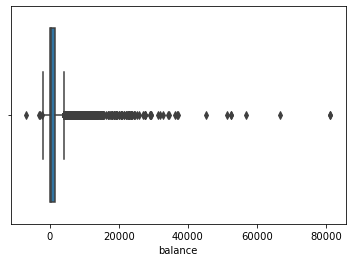

In [52]:
sns.boxplot(df.balance)

In [73]:
df.balance

0        2343
1          45
2        1270
3        2476
4         184
         ... 
11157       1
11158     733
11159      29
11160       0
11161       0
Name: balance, Length: 11162, dtype: int64

<AxesSubplot:xlabel='duration'>

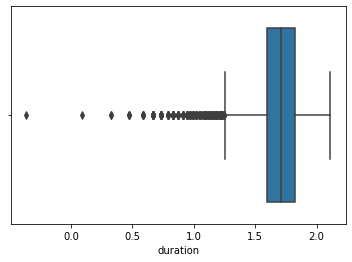

In [88]:
sns.boxplot(np.log(df.duration))

In [82]:
df_num.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [86]:
df['duration'] = np.log(df.duration)

In [87]:
df.duration

0        6.948897
1        7.290975
2        7.236339
3        6.361302
4        6.511745
           ...   
11157    5.549076
11158    4.418841
11159    5.049856
11160    2.197225
11161    6.442540
Name: duration, Length: 11162, dtype: float64

In [75]:
df['balance'] = np.log(df.balance)

In [80]:
df.balance.value_counts()

-inf         774
 0.000000     39
 1.098612     35
 0.693147     34
 1.386294     29
            ... 
 8.173011      1
 8.052933      1
 7.090910      1
 7.580700      1
 7.860571      1
Name: balance, Length: 3381, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


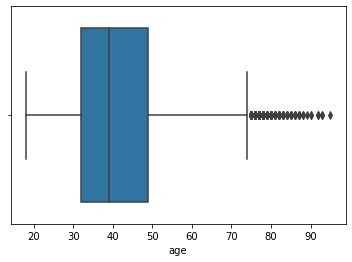

AxesSubplot(0.125,0.125;0.775x0.755)


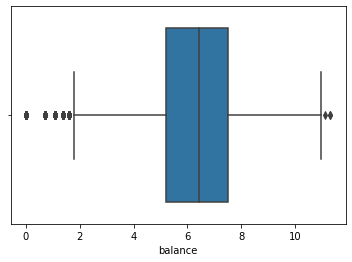

AxesSubplot(0.125,0.125;0.775x0.755)


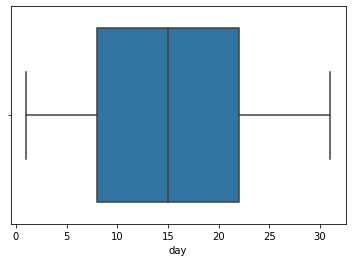

AxesSubplot(0.125,0.125;0.775x0.755)


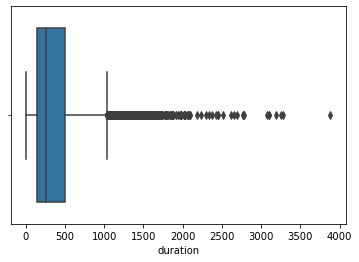

AxesSubplot(0.125,0.125;0.775x0.755)


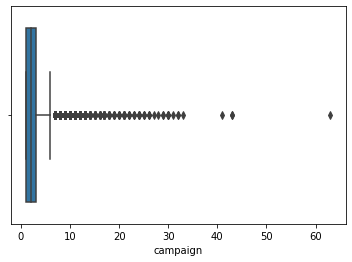

AxesSubplot(0.125,0.125;0.775x0.755)


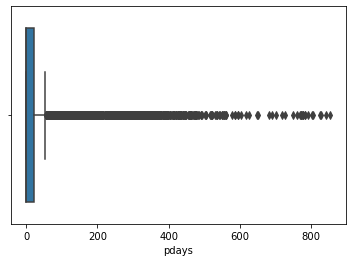

AxesSubplot(0.125,0.125;0.775x0.755)


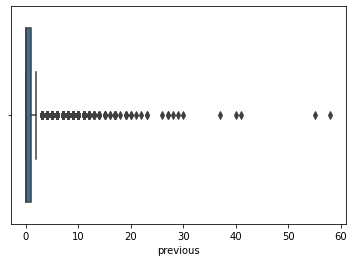

In [77]:
for i in df_num.columns:
    print(sns.boxplot(df[i]))
    plt.show()

In [60]:
for i in df.columns:
    print(i)
    print(df[i].nunique())

age
76
job
12
marital
3
education
4
default
2
balance
3805
housing
2
loan
2
contact
3
day
31
month
12
duration
1428
campaign
36
pdays
472
previous
34
poutcome
4
deposit
2


In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [66]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [68]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [69]:
cat_cols=df.select_dtypes(include='object')
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [98]:
for i in cat_cols.columns:
    print('->',i)
    print(df[i].value_counts())
    print('--'*20)

-> job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
----------------------------------------
-> marital
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
----------------------------------------
-> education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
----------------------------------------
-> default
no     10994
yes      168
Name: default, dtype: int64
----------------------------------------
-> housing
no     5881
yes    5281
Name: housing, dtype: int64
----------------------------------------
-> loan
no     9702
yes    1460
Name: loan, dtype: int64
----------------------------------------
-> contact
cellular     8042
unknown      2346
telephone     774
Name

In [102]:
df.drop('poutcome', axis = 1, inplace = True)

In [90]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,1.047400e+04,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,-inf,NaN,NaN,NaN,15.658036,NaN,5.514803,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.420740,NaN,0.965029,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-inf,NaN,NaN,NaN,1.000000,NaN,0.693147,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,5.210849e+00,NaN,NaN,NaN,8.000000,NaN,4.927254,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,6.437752e+00,NaN,NaN,NaN,15.000000,NaN,5.541264,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,7.517928e+00,NaN,NaN,NaN,22.000000,NaN,6.206576,3.000000,20.750000,1.000000,NaN,NaN


In [95]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [100]:
df = df[df['job'] != 'unknown']


In [108]:
cat_cols.drop('poutcome', axis = 1, inplace = True)

In [101]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [103]:
df['education'].replace('unknown', df['education'].mode()[0], inplace = True)
df['contact'].replace('unknown',df['contact'].mode()[0], inplace = True)

In [109]:
for i in cat_cols.columns:
    print('->',i)
    print(df[i].value_counts())
    print('--'*20)

-> job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64
----------------------------------------
-> marital
married     6302
single      3499
divorced    1291
Name: marital, dtype: int64
----------------------------------------
-> education
secondary    5919
tertiary     3680
primary      1493
Name: education, dtype: int64
----------------------------------------
-> default
no     10925
yes      167
Name: default, dtype: int64
----------------------------------------
-> housing
no     5814
yes    5278
Name: housing, dtype: int64
----------------------------------------
-> loan
no     9634
yes    1458
Name: loan, dtype: int64
----------------------------------------
-> contact
cellular     10329
telephone      763
Name: contact, dtype: int64
--------------------------------

In [115]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'deposit'],
      dtype='object')

In [116]:
df['deposit'].replace('no', 0, inplace = True)
df['deposit'].replace('yes', 1, inplace = True)

<AxesSubplot:>

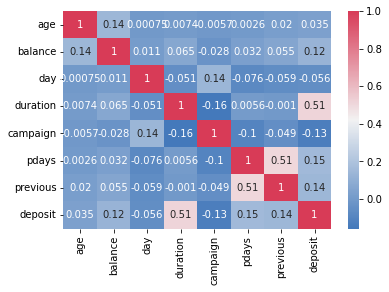

In [117]:
color = sns.diverging_palette(250, 6, as_cmap = True)
sns.heatmap(df.corr(), cmap = color, annot = True) 

## From this Heatmap we can conclude a lot of things, for example:

### 1. "duration" is the most positive correlated feature to Target y
### 2. "campaign" is the most negative correlated feature to Target y
### 3. "previous" and "pdays" are positive correlated to each other

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11092 non-null  int64  
 1   job        11092 non-null  object 
 2   marital    11092 non-null  object 
 3   education  11092 non-null  object 
 4   default    11092 non-null  object 
 5   balance    10404 non-null  float64
 6   housing    11092 non-null  object 
 7   loan       11092 non-null  object 
 8   contact    11092 non-null  object 
 9   day        11092 non-null  int64  
 10  month      11092 non-null  object 
 11  duration   11092 non-null  float64
 12  campaign   11092 non-null  int64  
 13  pdays      11092 non-null  int64  
 14  previous   11092 non-null  int64  
 15  deposit    11092 non-null  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 1.4+ MB


In [138]:
df.contact.value_counts()

cellular     10329
telephone      763
Name: contact, dtype: int64

In [140]:
df.select_dtypes('int64')

,age,day,campaign,pdays,previous,deposit
0,59,5,1,-1,0,1
1,56,5,1,-1,0,1
2,41,5,1,-1,0,1
3,55,5,1,-1,0,1
4,54,5,2,-1,0,1
...,...,...,...,...,...,...
11157,33,20,1,-1,0,0
11158,39,16,4,-1,0,0
11159,32,19,2,-1,0,0
11160,43,8,2,172,5,0


In [112]:
df1 = df.copy()
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [100]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [102]:
intdata = df.select_dtypes(include="int64")
intdata.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [111]:
df.age.sort_values()

2935    18
3174    18
4219    18
2498    18
3494    18
        ..
2802    92
3098    92
3822    93
3756    93
1582    95
Name: age, Length: 11162, dtype: int64

In [173]:
intdata = df1.select_dtypes(include="int64")
for column in intdata:
    df1[column + "_bin"] = pd.cut(df1[column], 8)
    df1.drop(column, axis = 1, inplace = True)
    
label = LabelEncoder()
data_calc = pd.DataFrame()
for column in df1:
    data_calc[column] = label.fit_transform(df1[column])
data_calc

,job,marital,education,default,housing,loan,contact,month,duration,age_bin,day_bin,campaign_bin,pdays_bin,previous_bin,deposit_bin
0,0,1,1,0,1,0,0,8,1020,4,1,0,0,0,1
1,0,1,1,0,0,0,0,8,1280,3,1,0,0,0,1
2,9,1,1,0,1,0,0,8,1244,2,1,0,0,0,1
3,7,1,1,0,1,0,0,8,577,3,1,0,0,0,1
4,0,1,2,0,0,0,0,8,671,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11087,1,2,0,0,1,0,0,0,255,1,5,0,0,0,0
11088,7,1,1,0,0,0,0,6,81,2,3,0,0,0,0
11089,9,2,1,0,0,0,0,1,154,1,4,0,0,0,0
11090,9,1,1,0,0,1,0,8,7,2,1,0,1,0,0


In [174]:
X = data_calc.iloc[:,:-1]
y = data_calc.iloc[:,-1]

In [175]:
data_calc.isnull().sum()

job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
duration        0
age_bin         0
day_bin         0
campaign_bin    0
pdays_bin       0
previous_bin    0
deposit_bin     0
dtype: int64

In [163]:
df1.drop('balance', axis = 1, inplace = True)

In [172]:
df1

,job,marital,education,default,housing,loan,contact,month,duration,age_bin,day_bin,campaign_bin,pdays_bin,previous_bin,deposit_bin
0,admin.,married,secondary,no,yes,no,cellular,may,6.948897,"(56.5, 66.125]","(4.75, 8.5]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(0.875, 1.0]"
1,admin.,married,secondary,no,no,no,cellular,may,7.290975,"(46.875, 56.5]","(4.75, 8.5]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(0.875, 1.0]"
2,technician,married,secondary,no,yes,no,cellular,may,7.236339,"(37.25, 46.875]","(4.75, 8.5]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(0.875, 1.0]"
3,services,married,secondary,no,yes,no,cellular,may,6.361302,"(46.875, 56.5]","(4.75, 8.5]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(0.875, 1.0]"
4,admin.,married,tertiary,no,no,no,cellular,may,6.511745,"(46.875, 56.5]","(4.75, 8.5]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(0.875, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,5.549076,"(27.625, 37.25]","(19.75, 23.5]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(-0.001, 0.125]"
11158,services,married,secondary,no,no,no,cellular,jun,4.418841,"(37.25, 46.875]","(12.25, 16.0]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(-0.001, 0.125]"
11159,technician,single,secondary,no,no,no,cellular,aug,5.049856,"(27.625, 37.25]","(16.0, 19.75]","(0.938, 8.75]","(-1.855, 105.875]","(-0.058, 7.25]","(-0.001, 0.125]"
11160,technician,married,secondary,no,no,yes,cellular,may,2.197225,"(37.25, 46.875]","(4.75, 8.5]","(0.938, 8.75]","(105.875, 212.75]","(-0.058, 7.25]","(-0.001, 0.125]"


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 10)

In [177]:
print(X_trian.shape)

(8319, 15)


In [178]:
MLA = [
       ensemble.AdaBoostClassifier(),
       ensemble.BaggingClassifier(),
       ensemble.GradientBoostingClassifier(),
       ensemble.RandomForestClassifier(), 
       linear_model.SGDClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       tree.DecisionTreeClassifier(),
       tree.ExtraTreeClassifier(),
]

In [179]:
name = []
testscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    testscore.append(alg.score(X_test, y_test))

In [180]:
comparison = pd.DataFrame({"name": name, "testscore": testscore})

In [181]:
comparison

,name,testscore
0,AdaBoostClassifier,0.801659
1,BaggingClassifier,0.794086
2,GradientBoostingClassifier,0.825460
3,RandomForestClassifier,0.822935
4,SGDClassifier,0.688785
5,GaussianNB,0.733502
6,KNeighborsClassifier,0.716192
7,DecisionTreeClassifier,0.750811
8,ExtraTreeClassifier,0.715110


In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [33]:
predictors=df.drop('deposit',axis=1)
target=df['deposit']

In [36]:
target.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [35]:
target.value_counts(normalize=True)   # almost the data is normally distributed (balanced dataset)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [46]:
con=predictors.select_dtypes(['int64'])

In [64]:
result=[]
good_predictor=[]
a=df[df.deposit=='no']
b=df[df.deposit=='yes']
for i in con.columns:
    print(i)
    print(ttest_ind(a[i],b[i]))
    result.append(ttest_ind(a[i],b[i]))
for j in result:
    if j.pvalue<0.05:
        good_predictor.append(j)
        

age
Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526)
balance
Ttest_indResult(statistic=-8.598842126021864, pvalue=9.126568254859532e-18)
day
Ttest_indResult(statistic=5.959773914840384, pvalue=2.602202903938695e-09)
duration
Ttest_indResult(statistic=-53.51796190607506, pvalue=0.0)
campaign
Ttest_indResult(statistic=13.64294296418874, pvalue=4.8313242340953003e-42)
pdays
Ttest_indResult(statistic=-16.201610868708798, pvalue=2.271607022915964e-58)
previous
Ttest_indResult(statistic=-14.922371096299393, pvalue=7.125337986152125e-50)


In [65]:
good_predictor

[Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526),
 Ttest_indResult(statistic=-8.598842126021864, pvalue=9.126568254859532e-18),
 Ttest_indResult(statistic=5.959773914840384, pvalue=2.602202903938695e-09),
 Ttest_indResult(statistic=-53.51796190607506, pvalue=0.0),
 Ttest_indResult(statistic=13.64294296418874, pvalue=4.8313242340953003e-42),
 Ttest_indResult(statistic=-16.201610868708798, pvalue=2.271607022915964e-58),
 Ttest_indResult(statistic=-14.922371096299393, pvalue=7.125337986152125e-50)]

In [63]:
for i in result:
    print(i)
    print('jeevan')

Ttest_indResult(statistic=-3.6892130272779955, pvalue=0.00022601800590796526)
jeevan
Ttest_indResult(statistic=-8.598842126021864, pvalue=9.126568254859532e-18)
jeevan
Ttest_indResult(statistic=5.959773914840384, pvalue=2.602202903938695e-09)
jeevan
Ttest_indResult(statistic=-53.51796190607506, pvalue=0.0)
jeevan
Ttest_indResult(statistic=13.64294296418874, pvalue=4.8313242340953003e-42)
jeevan
Ttest_indResult(statistic=-16.201610868708798, pvalue=2.271607022915964e-58)
jeevan
Ttest_indResult(statistic=-14.922371096299393, pvalue=7.125337986152125e-50)
jeevan


In [68]:
cat_var=predictors.select_dtypes('object')

In [69]:
cat_var

,job,marital,education,default,housing,loan,contact,month,poutcome
0,admin.,married,secondary,no,yes,no,unknown,may,unknown
1,admin.,married,secondary,no,no,no,unknown,may,unknown
2,technician,married,secondary,no,yes,no,unknown,may,unknown
3,services,married,secondary,no,yes,no,unknown,may,unknown
4,admin.,married,tertiary,no,no,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown
11158,services,married,secondary,no,no,no,unknown,jun,unknown
11159,technician,single,secondary,no,no,no,cellular,aug,unknown
11160,technician,married,secondary,no,no,yes,cellular,may,failure


In [71]:
from scipy.stats import chi2,chi2_contingency

ct_job=pd.crosstab(df.job,df.deposit)
ct_job

deposit,no,yes
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


In [79]:
res[1]

2.741689587081072e-74